In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime


# 任务数据
active_name = ['静止','移动','工作']
hand_craft = [
    [
        [datetime.strptime('00:00', '%M:%S'), datetime.strptime('07:06', '%M:%S')],
        [datetime.strptime('07:20', '%M:%S'), datetime.strptime('07:23', '%M:%S')],
        [datetime.strptime('20:51', '%M:%S'), datetime.strptime('21:00', '%M:%S')],
        [datetime.strptime('21:10', '%M:%S'), datetime.strptime('21:25', '%M:%S')],
        [datetime.strptime('24:37', '%M:%S'), datetime.strptime('24:39', '%M:%S')]
    ],
    [
        [datetime.strptime('07:23', '%M:%S'), datetime.strptime('07:53', '%M:%S')],
        [datetime.strptime('17:04', '%M:%S'), datetime.strptime('17:19', '%M:%S')]
    ],
    [
        [datetime.strptime('07:06', '%M:%S'), datetime.strptime('07:20', '%M:%S')],
        [datetime.strptime('07:53', '%M:%S'), datetime.strptime('17:04', '%M:%S')],
        [datetime.strptime('17:19', '%M:%S'), datetime.strptime('20:51', '%M:%S')],
        [datetime.strptime('21:00', '%M:%S'), datetime.strptime('21:10', '%M:%S')],
        [datetime.strptime('21:25', '%M:%S'), datetime.strptime('24:37', '%M:%S')],
        [datetime.strptime('24:39', '%M:%S'), datetime.strptime('26:13', '%M:%S')]
    ]
]

auto_rec = [
    [
        [datetime.strptime('00:00', '%M:%S'), datetime.strptime('07:04', '%M:%S')],
        [datetime.strptime('21:12', '%M:%S'), datetime.strptime('21:27', '%M:%S')]
    ],
    [
        [datetime.strptime('07:23', '%M:%S'), datetime.strptime('07:45', '%M:%S')],
        [datetime.strptime('17:06', '%M:%S'), datetime.strptime('17:15', '%M:%S')]
    ],
    [
        [datetime.strptime('07:04', '%M:%S'), datetime.strptime('07:23', '%M:%S')],
        [datetime.strptime('07:45', '%M:%S'), datetime.strptime('17:06', '%M:%S')],
        [datetime.strptime('17:15', '%M:%S'), datetime.strptime('21:12', '%M:%S')],
        [datetime.strptime('21:27', '%M:%S'), datetime.strptime('26:13', '%M:%S')],
    ]
]

base_date = datetime(2023, 1, 1)
hand_craft_datetime = []
for activity in hand_craft:
    activity_datetime = []
    for interval in activity:
        start = base_date.replace(hour=interval[0].hour, minute=interval[0].minute, second=interval[0].second)
        end = base_date.replace(hour=interval[1].hour, minute=interval[1].minute, second=interval[1].second)
        activity_datetime.append((start, end))
    hand_craft_datetime.append(activity_datetime)

auto_rec_datetime = []
for activity in auto_rec:
    activity_datetime = []
    for interval in activity:
        start = base_date.replace(hour=interval[0].hour, minute=interval[0].minute, second=interval[0].second)
        end = base_date.replace(hour=interval[1].hour, minute=interval[1].minute, second=interval[1].second)
        activity_datetime.append((start, end))
    auto_rec_datetime.append(activity_datetime)

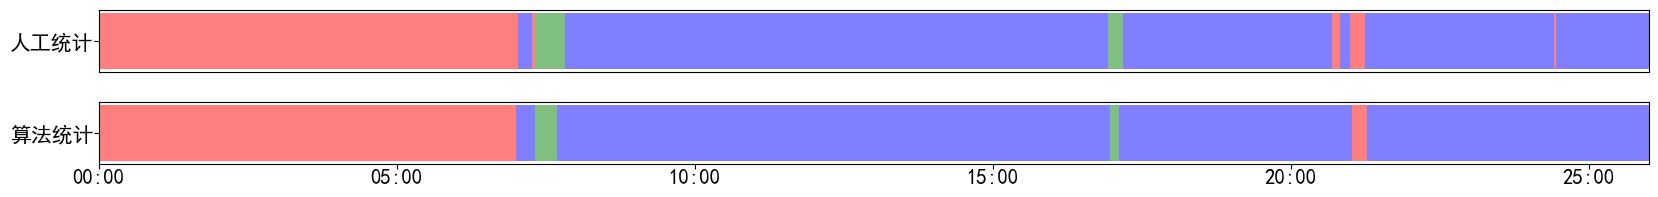

In [2]:
fig, ax = plt.subplots(2, 1, figsize=(20, 2))
ax[0].set_xticks([])
ax[0].set_xlim([0, 0.0182])
ax[1].set_xlim([0, 0.0182])
ax[1].set_xticks([0.000, 0.0035, 0.0070, 0.0105, 0.0140, 0.0175], 
                  ["00:00", "05:00", "10:00", "15:00", "20:00", "25:00"])

from matplotlib.dates import date2num as d2n

colors = ['red', 'green', 'blue']
for i, activity_intervals in enumerate(hand_craft_datetime):
    for x in activity_intervals:
        ax[0].barh("人工统计", (d2n(x[1]) - d2n(x[0])),
                   left=(d2n(x[0]) - d2n(datetime(2023, 1, 1, 0, 0, 0))), 
                   height=0.4, color=colors[i], alpha=0.5)
        
for i, activity_intervals in enumerate(auto_rec_datetime):
    for x in activity_intervals:
        ax[1].barh("算法统计", (d2n(x[1]) - d2n(x[0])),
                   left=(d2n(x[0]) - d2n(datetime(2023, 1, 1, 0, 0, 0))), 
                   height=0.4, color=colors[i], alpha=0.5)
ax[0].tick_params(labelsize=15, pad=0.1)
ax[1].tick_params(labelsize=15, pad=0.1)
plt.subplots_adjust(hspace=0.5)


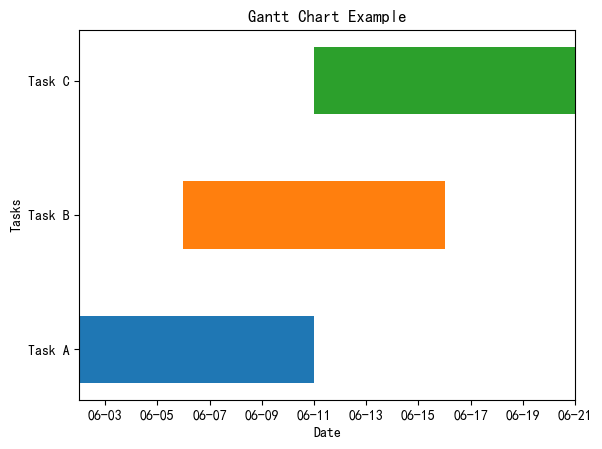

In [109]:
# import matplotlib.pyplot as plt
# import datetime

# # 任务数据
# tasks = ['Task A', 'Task B', 'Task C']
# start_dates = [datetime.date(2024, 6, 1),
#                datetime.date(2024, 6, 5),
#                datetime.date(2024, 6, 10)]
# end_dates = [datetime.date(2024, 6, 10),
#              datetime.date(2024, 6, 15),
#              datetime.date(2024, 6, 20)]

# # 计算持续时间
# durations = [(end - start).days for start, end in zip(start_dates, end_dates)]

# # 创建图表
# fig, ax = plt.subplots()

# # 绘制横道图
# for i, task in enumerate(tasks):
#     ax.barh(i, durations[i], left=start_dates[i].toordinal(), height=0.5)

# # 设置y轴刻度和标签
# ax.set_yticks(range(len(tasks)))
# ax.set_yticklabels(tasks)

# # 设置x轴的日期格式
# ax.xaxis_date()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# # 设置图表标题和轴标签
# ax.set_title('Gantt Chart Example')
# ax.set_xlabel('Date')
# ax.set_ylabel('Tasks')

# # 设置x轴的日期范围
# start, end = min(start_dates), max(end_dates)
# ax.set_xlim(start.toordinal(), end.toordinal())

# # 显示图表
# plt.show()